In [26]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Data import from advertising.csv

In [27]:
data = pd.read_csv(r"H:\Data_Science_internship\Assignments-Internship\sales prediction\advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [28]:
data.shape

(200, 4)

In [33]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [29]:
data.isnull().any()


TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [30]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Data visualization

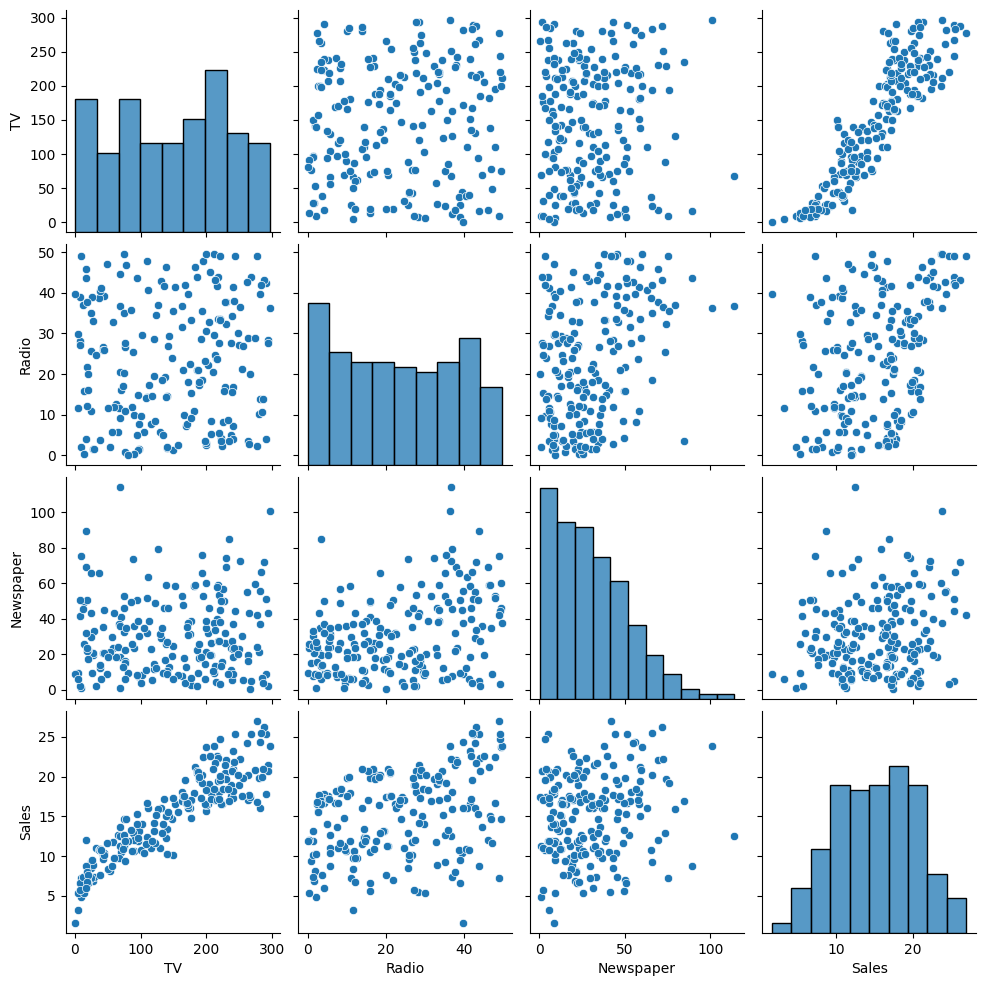

In [11]:
sns.pairplot(data)
plt.show()

<Axes: xlabel='Newspaper', ylabel='Sales'>

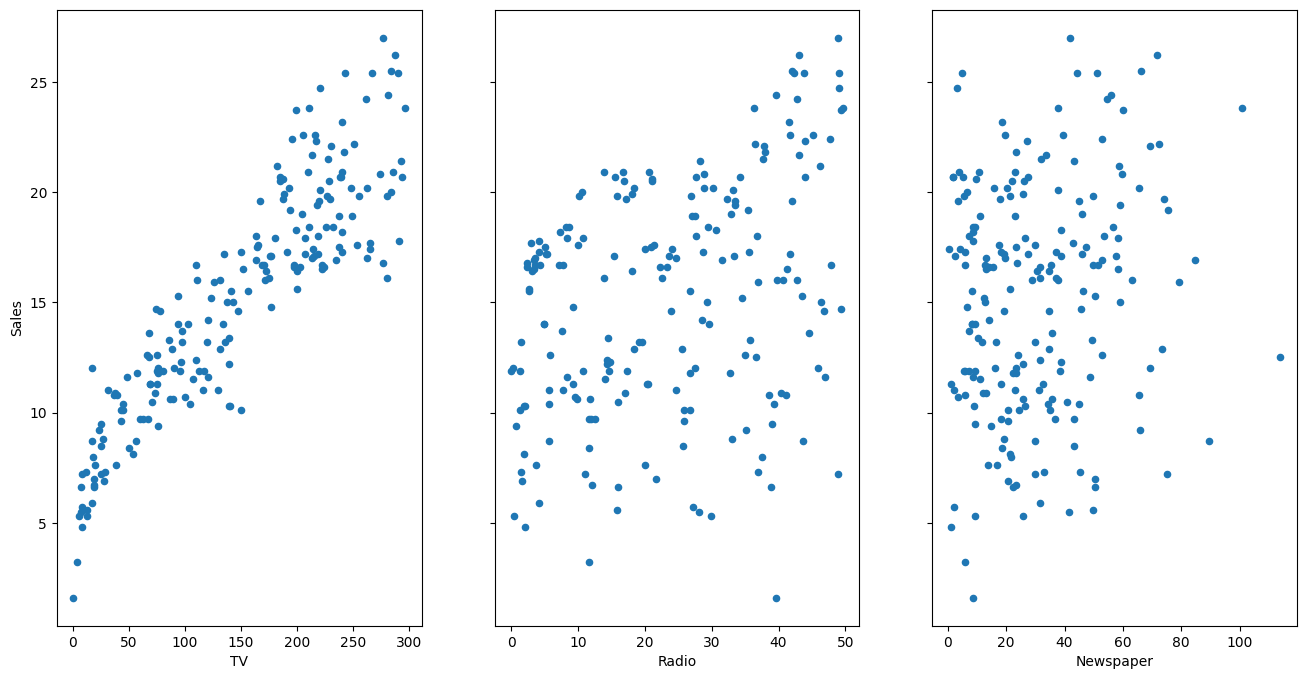

In [36]:
fig,axs= plt.subplots(1,3,sharey=True) # data visualization
data.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
data.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8)) 

In [16]:
X = data.iloc[:,:3]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [17]:
Y = data['Sales']
Y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [38]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state =7)

In [20]:
print("Total sample in x_train : ",len(X_train),"\nTotal sample in x_test : ",len(X_test),"\nTotal sample of y_train : ",len(Y_train),"\nTotal sample of y_test : ",len(Y_test))

Total sample in x_train :  140 
Total sample in x_test :  60 
Total sample of y_train :  140 
Total sample of y_test :  60


### Linear Regression

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train,Y_train)

LinearRegression()

In [41]:
model.coef_

array([0.05489872, 0.10450797, 0.00293432])

In [43]:
model.intercept_

4.523975602719339

In [42]:
Y_pred = model.predict(X_test)

In [44]:
Y_pred

array([11.63366655, 15.21754453,  7.05585772, 18.83066033,  7.04827998,
       10.46849777,  7.97178425, 11.91519428,  8.83063697, 13.28015879,
        5.36007066, 15.75505399,  9.65153071,  9.28655261, 21.68852863,
        5.97807843,  9.31466461, 16.43895075, 18.18771735, 10.58777531,
       20.02436444, 19.26763798, 10.96301822, 18.84869908, 12.47986734,
       21.25824716, 24.88566972, 15.23175364, 21.37251302, 14.78618876,
       14.05644462,  7.13318067, 15.97568346, 20.83787599, 20.71656683,
       17.24614064,  9.1660222 , 25.01737563, 11.57403626, 13.73546062,
        9.17650439, 21.74844495,  7.73286775, 17.11788446, 19.51763841,
       18.06421956, 16.58060267,  9.8151213 , 12.65374501, 17.06695029,
       10.10492319, 10.69198893,  8.84527248,  7.97279958, 19.51236625,
       21.08214019, 10.51907876, 19.07927523, 10.77623749, 16.93397218])

In [45]:
print("RMSE : {:.2f}".format(np.sqrt(mean_squared_error(Y_test,Y_pred))))

RMSE : 1.65


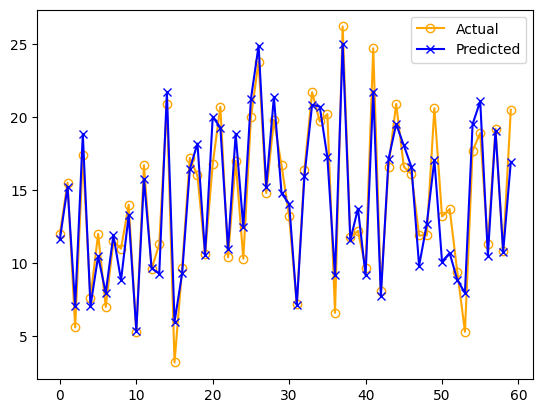

In [47]:
plt.plot(range(Y_test.shape[0]),Y_test,marker = 'o',c="orange",mfc = "None",label = "Actual")
plt.plot(range(Y_pred.shape[0]),Y_pred,marker = 'x',c="blue",mfc = "None",label = "Predicted")
plt.legend()
plt.show()